# GROUP  MEMBERS
1- Doaa Mohamed    106413

2- Inês Leite      92928

3- Pedro Marques  92926

In [1]:
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/how-to-deal-with-imbalanced-data-in-python-f9b71aba53eb
https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

SyntaxError: invalid syntax (Temp/ipykernel_23488/4126037848.py, line 1)

# Turbo Engine data description

The engine under study is a turbofan engine (a jet engine). A turbofan engine has many components. A few important components are: Fan, Low Pressure Compressor (LPC), High Pressure Compressor (HPC), Low Pressure Turbine (LPT), High Pressure Turbine (HPT).

In [1]:
!pip install pandas
!pip install numpy
!pip install imblearn

https://www.youtube.com/watch?v=m7KWxX23zCU

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, f1_score, \
    roc_auc_score
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.svm import SVC
import numpy as np
import seaborn as sn
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from numpy import mean
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTETomek 


## Load Data

In [96]:
train = pd.read_csv(r'dataTopicF/train_FD001.csv', sep=';')
train

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,no
1,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,no
2,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,no
3,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,no
4,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,yes
20627,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,yes
20628,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,yes
20629,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,yes


In [97]:
test = pd.read_csv(r'dataTopicF\test_FD001.csv', sep=';')
test

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,no
1,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,no
2,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,no
3,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,...,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,no
4,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,...,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,...,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,yes
13092,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,...,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,yes
13093,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,...,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,yes
13094,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,...,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,yes


In [98]:
original_test = pd.read_csv('dataTopicF/test_FD001_original.txt', sep='\s+')
original_test.columns = ['unit_id', 'time'] + list(test.columns)[:-1]
original_test

,unit_id,time,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
1,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
2,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
3,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
4,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13090,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13091,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13092,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13093,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [99]:
test_df = pd.DataFrame(columns=list(original_test.columns)) 
for i in range(1,101):
    x = original_test.loc[original_test['unit_id'] == i]
    last_cycle = max(x['time'])
    to_test = original_test.loc[original_test['unit_id'] == i].loc[original_test['time'] == last_cycle]
    test_df = test_df.append(to_test, ignore_index=True)
test_df

,unit_id,time,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,...,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,...,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,...,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740
3,4,106,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,...,521.88,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581
4,5,98,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,...,521.00,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,...,522.30,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606
96,97,134,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,...,521.58,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953
97,98,121,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,...,521.53,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608
98,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,...,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595


#### Filtering from the original dataset

In [100]:
test_df = test_df[[x for x in test_df.columns[2:]]] #Remove first 2 cols
test = pd.merge(test_df, test, how ='inner', on =list(test_df.columns))
test


,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,Failure_status
0,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,...,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,no
1,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,...,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,no
2,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,...,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,no
3,0.0012,0.0004,100.0,518.67,642.78,1594.53,1406.88,14.62,21.61,552.64,...,2388.11,8133.64,8.4634,0.03,395,2388,100.0,38.58,23.2581,no
4,-0.0013,-0.0004,100.0,518.67,642.27,1589.94,1419.36,14.62,21.61,553.29,...,2388.15,8125.74,8.4362,0.03,394,2388,100.0,38.75,23.4117,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.0006,0.0003,100.0,518.67,642.30,1590.88,1397.94,14.62,21.61,553.99,...,2388.01,8148.24,8.4110,0.03,391,2388,100.0,38.96,23.4606,no
96,0.0013,-0.0001,100.0,518.67,642.59,1582.96,1410.92,14.62,21.61,554.05,...,2388.06,8155.48,8.4500,0.03,395,2388,100.0,38.61,23.2953,no
97,0.0017,0.0001,100.0,518.67,642.68,1599.51,1415.47,14.62,21.61,553.44,...,2388.09,8146.39,8.4235,0.03,394,2388,100.0,38.76,23.3608,no
98,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,...,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,no


# Data Analysis
-Remove rows with missing values
-Remove duplicate rows
-Check features/types
  

In [101]:
print(f"Features: {list(train.columns)}")
print(f"Entries in train dataset: {train.shape[0]}")
print(f"Missing Values in train dataset: {train.isna().sum().sum()}")
print(f"Duplicate rows in train dataset: {train[train.duplicated(keep=False)].shape[0]}")
print()
print(f"Entries in test dataset: {test.shape[0]}")
print(f"Missing Values in test dataset: {test.isna().sum().sum()}")
print(f"Duplicate rows in test dataset: {test[test.duplicated(keep=False)].shape[0]}")

Features: ['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 'Failure_status']
Entries in train dataset: 20631
Missing Values in train dataset: 0
Duplicate rows in train dataset: 0

Entries in test dataset: 100
Missing Values in test dataset: 0
Duplicate rows in test dataset: 0


### Class Imbalance

The distribution of Failure status is important because it speaks to class imbalance within machine learning and data mining applications. 
Class imbalance is a term used to describe when a target class within a data set is outnumbered by another target class (or classes). 
This can create misleading accuracy metrics, known as an accuracy paradox. To make sure our target classes aren't imbalanced, create a function that will output the distribution of the target classes.

In [102]:
print(f"Train dataset: Failure Status\n {train.iloc[:, train.shape[1]-1].value_counts()}")

Train dataset: Failure Status
 no     17531
yes     3100
Name: Failure_status, dtype: int64


In [103]:
print(f"Test dataset: Failure Status\n {test.iloc[:, test.shape[1]-1].value_counts()}")

Test dataset: Failure Status
 no     75
yes    25
Name: Failure_status, dtype: int64


As we can see, the data is imbalanced in both datasets, furthermore we can actually visualize this disparity below

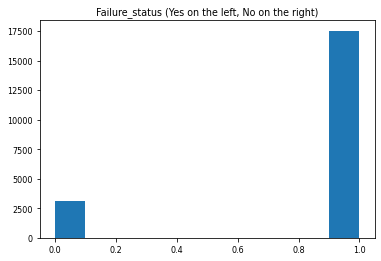

In [104]:
x = train['Failure_status'].map({'yes':0,'no':1})
a=x
plt.hist(a)


plt.title('Failure_status (Yes on the left, No on the right)')
plt.show()

# Pre Processing


#### Feature Selection
Some features which pose no value to our algorithm can be dropped

In [105]:
cols = list(train.select_dtypes(include=[float, int]).columns)
train_max = train.select_dtypes(include=[float, int]).max()
train_min = train.select_dtypes(include=[float, int]).min()
variance = (train_max - train_min)

dont_use_cols = [x for x in cols if variance[x] == 0]
print(f"Features with no variance: {dont_use_cols}")
cols.append("Failure_status")
#These features provide no useful value to the model, so they are dropped

train = train[[x for x in cols if x not in dont_use_cols]]
test = test[[x for x in cols if x not in dont_use_cols]]

Features with no variance: ['setting3', 's1', 's5', 's10', 's16', 's18', 's19']


#### Normalization
Values for each feature are really diverse and need to be normalized, below are all the values for the train dataset for all features excluding the ones with no variance

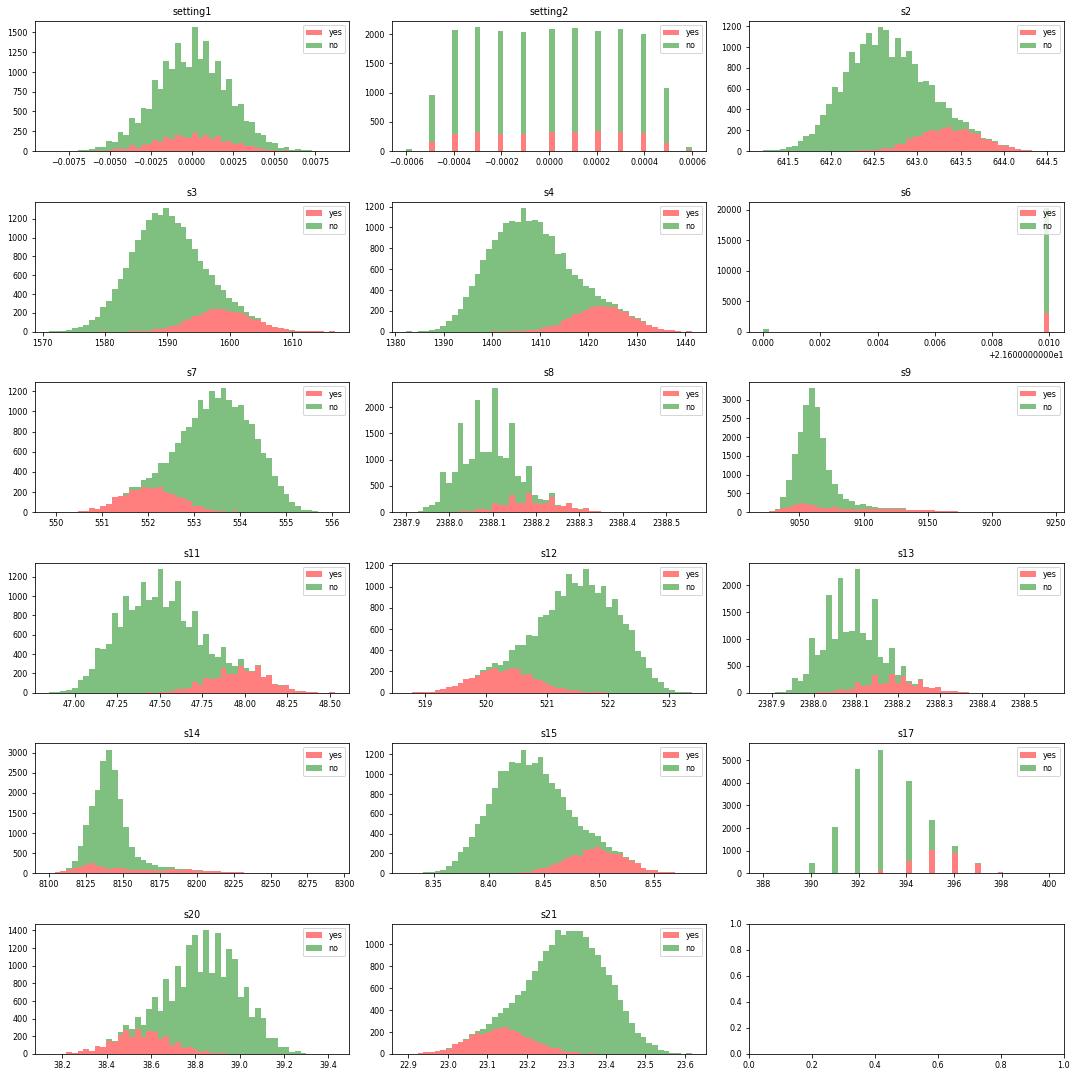

In [106]:
#Joining both datasets to check values
df = pd.concat([train, test])
features_mean = train.select_dtypes(include=[float, int]).columns
# Separating the data 
df_yes=df[df['Failure_status'] =="yes"]
df_no=df[df['Failure_status'] =="no"]

#Creating the window with all subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axes = axes.ravel()

#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    if idx<len(features_mean):
        ax.figure
        ax.hist([df_yes[features_mean[idx]],df_no[features_mean[idx]]], bins = 50 ,alpha=0.5, stacked=True, label=['yes','no'],color=['r','g'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

These values need to be normalized, we use the zscore

In [107]:
train['Failure_status'] = train['Failure_status'].map({'yes':0,'no':1})
X_train = train.iloc[:, :train.shape[1]-1]
Y_train = train.iloc[:, train.shape[1]-1]
cols = X_train.columns
for col in cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std(ddof=0)
X_train

C:\Users\pedro\AppData\Local\Temp/ipykernel_8672/1446048313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Failure_status'] = train['Failure_status'].map({'yes':0,'no':1})


,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.315980,-1.372953,-1.721725,-0.134255,-0.925936,0.141683,1.121141,-0.516338,-0.862813,-0.266467,0.334262,-1.058890,-0.269071,-0.603816,-0.781710,1.348493,1.194427
1,0.872722,-1.031720,-1.061780,0.211528,-0.643726,0.141683,0.431930,-0.798093,-0.958818,-0.191583,1.174899,-0.363646,-0.642845,-0.275852,-0.781710,1.016528,1.236922
2,-1.961874,1.015677,-0.661813,-0.413166,-0.525953,0.141683,1.008155,-0.234584,-0.557139,-1.015303,1.364721,-0.919841,-0.551629,-0.649144,-2.073094,0.739891,0.503423
3,0.324090,-0.008022,-0.661813,-1.261314,-0.784831,0.141683,1.222827,0.188048,-0.713826,-1.539489,1.961302,-0.224597,-0.520176,-1.971665,-0.781710,0.352598,0.777792
4,-0.864611,-0.690488,-0.621816,-1.251528,-0.301518,0.141683,0.714393,-0.516338,-0.457059,-0.977861,1.052871,-0.780793,-0.521748,-0.339845,-0.136018,0.463253,1.059552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,-0.178822,-1.031720,1.618000,1.216258,2.188375,0.141683,-2.189329,1.315066,0.012547,1.980044,-2.607969,2.278282,-0.322542,1.425294,2.446751,-1.805173,-2.921113
20627,-0.727453,-1.714186,1.717992,2.279706,2.738351,0.141683,-2.833345,1.878576,-0.006020,1.867718,-2.350355,1.722087,-0.380207,1.913240,1.155367,-2.856395,-1.203764
20628,0.186933,-0.008022,1.478011,1.946971,2.138377,0.141683,-2.742957,2.019453,0.029755,2.054927,-1.902919,2.000184,-0.141684,3.265092,3.092444,-2.081810,-3.292481
20629,-0.498857,1.015677,1.098043,2.403666,1.955051,0.141683,-3.036719,2.160330,0.383884,3.178182,-2.363913,1.861136,-0.233948,2.579834,1.155367,-2.911722,-2.085072


In [109]:
test['Failure_status'] = test['Failure_status'].map({'yes':0,'no':1})
X_test = test.iloc[:, :test.shape[1]-1]
Y_test = test.iloc[:, test.shape[1]-1]

cols = X_test.columns
for col in cols:
    X_test[col] = (X_test[col] - X_test[col].mean())/X_test[col].std(ddof=0)
X_test

C:\Users\pedro\AppData\Local\Temp/ipykernel_8672/1243296297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Failure_status'] = test['Failure_status'].map({'yes':0,'no':1})


,setting1,setting2,s2,s3,s4,s6,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,-0.225120,1.240071,-0.425894,-1.603619,-1.355943,0.100504,1.451228,-0.607375,-0.333751,-1.427840,0.739155,-0.842309,-0.657866,-1.537896,-0.356332,0.291274,0.994198
1,0.800093,-0.400235,-0.493712,-0.791580,0.032832,0.100504,0.423689,-0.296697,-0.865218,0.292920,0.667113,-0.401310,-0.831042,-0.071375,-1.726838,0.291274,0.021750
2,-0.652292,1.240071,0.252281,-0.313732,0.971886,0.100504,-0.638102,0.635336,-0.660034,1.114192,-0.644059,0.333690,-0.585035,-1.248251,1.014175,1.064567,0.148772
3,0.543790,1.240071,0.026223,0.409090,-0.427375,0.100504,-0.581016,0.169319,-0.566810,0.214704,0.868832,-0.107310,-0.467426,0.321934,1.014175,-1.190872,-0.016773
4,-0.524140,-1.384418,-1.126675,-0.285000,1.026645,0.100504,0.161095,-0.296697,-0.443883,-0.528352,-0.399115,0.480690,-0.893623,-0.507368,0.328921,-0.095373,1.582456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.225120,0.912010,-1.058858,-0.142855,-1.468956,0.100504,0.960293,-1.384069,-0.059106,-1.779813,1.473988,-1.577309,0.320231,-1.275691,-1.726838,1.257891,2.091585
96,0.586507,-0.400235,-0.403288,-1.340501,0.043318,0.100504,1.028795,-0.918053,0.578381,-0.841217,0.436577,-0.842309,0.710822,-0.086619,1.014175,-0.997549,0.370540
97,0.757376,0.255888,-0.199836,1.162154,0.573429,0.100504,0.332352,0.169319,-0.062305,0.253812,0.364535,-0.401310,0.220425,-0.894578,0.328921,-0.030932,1.052503
98,2.038893,-0.072173,-1.737033,-1.027480,-1.464295,0.100504,1.827992,-1.694747,0.157960,-1.310515,0.782381,-1.430309,0.435682,-1.601923,-1.726838,1.193450,1.038968


0        1
1        1
2        1
3        1
4        1
        ..
20626    0
20627    0
20628    0
20629    0
20630    0
Name: Failure_status, Length: 20631, dtype: int64


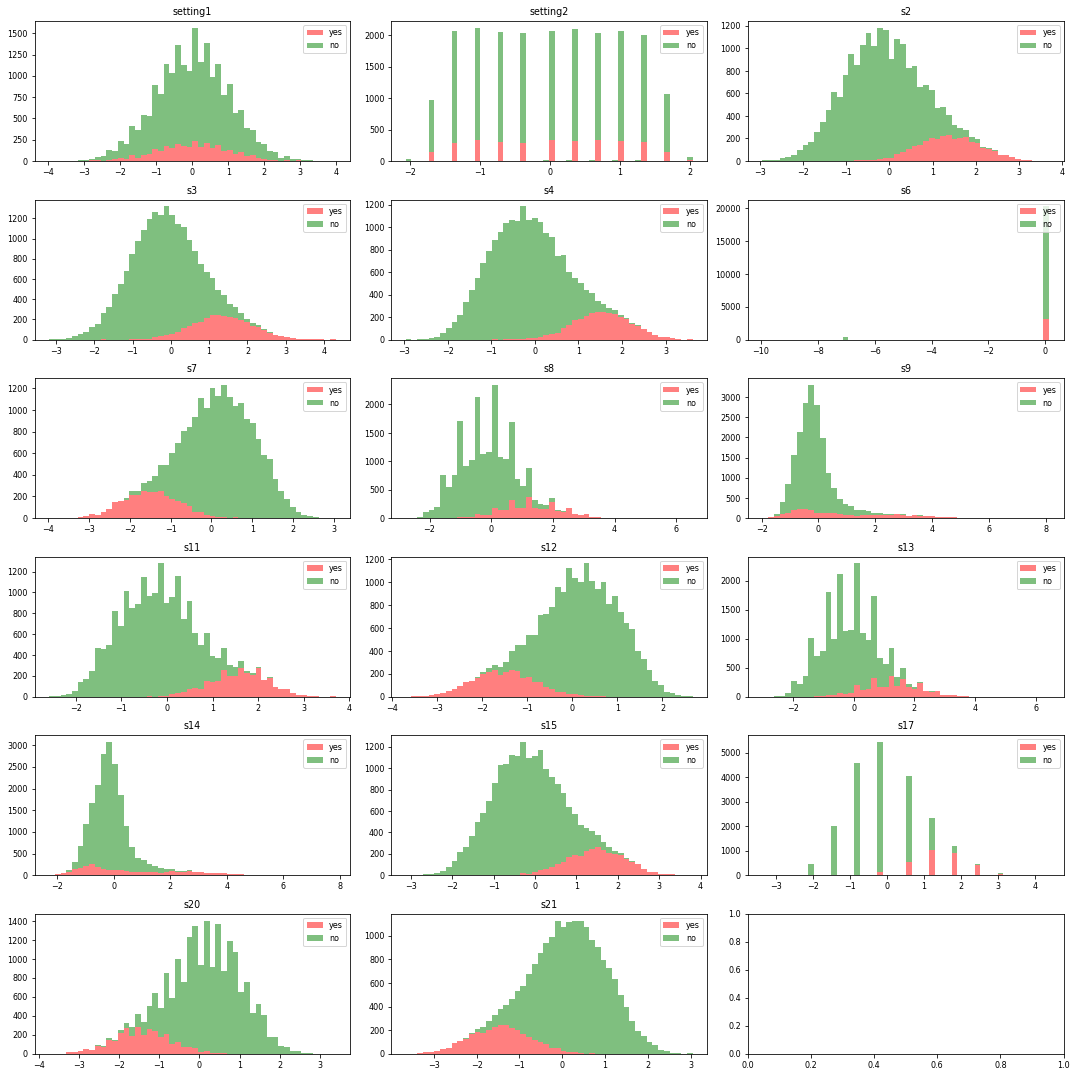

In [110]:
#Joining all datasets to check values
train = X_train.assign(Failure_status = Y_train)
test =  X_test.assign(Failure_status = Y_test)


df = pd.concat([train, test])
features_mean = df.columns[:-1]

# Separating the data 
df_yes=df[df['Failure_status'] ==0]
df_no=df[df['Failure_status'] ==1]


#Creating the window with all subplots.
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,15))
axes = axes.ravel()
#Creating histograms with 50 bins
for idx,ax in enumerate(axes):
    if idx<len(features_mean):
        ax.figure
        ax.hist([df_yes[features_mean[idx]],df_no[features_mean[idx]]], bins = 50 ,alpha=0.5, stacked=True, label=['yes','no'],color=['r','g'])
        ax.legend(loc='upper right')
        ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

In [111]:
k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(X_train,Y_train)
features_names = reversed(rankings.feature_names_in_)
b=list(rankings.scores_)

a=list(range(0,len(b)))

sf = [g for _,g in sorted(zip(b,a))]
c=1
sf=reversed(sf)
print('Rank  \t','index\t\t f-score')
inx=[]
for chosen in sf:
    print(str(c)+'º:\t', rankings.feature_names_in_[chosen],'\t\t', b[chosen])
    c+=1



Rank  	 index		 f-score
1º:	 s11 		 16413.344931794476
2º:	 s4 		 14964.686354057492
3º:	 s12 		 14324.885300408052
4º:	 s7 		 13264.886445366566
5º:	 s15 		 12796.099149251731
6º:	 s21 		 12002.45185423512
7º:	 s20 		 11598.502905676201
8º:	 s17 		 10625.481293251145
9º:	 s2 		 10534.073664613947
10º:	 s3 		 9518.132134893915
11º:	 s8 		 8621.677328516585
12º:	 s13 		 8487.760633439253
13º:	 s9 		 4406.586921226188
14º:	 s14 		 2715.5251717918427
15º:	 s6 		 73.48776580634305
16º:	 setting1 		 2.2743512391580785
17º:	 setting2 		 1.823783641342156


#### PCA
PCA will be used for dimension reduction, which in turn will speed up the algorithms.
We're reducing the dataset into 2 dimensions.

The new components are just the two main dimensions of variation.

In [112]:
X_train = train.iloc[:, :train.shape[1]-1]
Y_train = train.iloc[:, train.shape[1]-1]
X_test = test.iloc[:, :test.shape[1]-1]
Y_test = test.iloc[:, test.shape[1]-1]


In [113]:
pca = PCA(n_components=2)
X_train = (pca.fit_transform(X_train))
X_test = (pca.fit_transform(X_test))

In [114]:
X_train

array([[-2.95277932, -0.43216468],
       [-2.36366948, -0.78686256],
       [-2.97866515, -0.55247753],
       ...,
       [ 8.0001566 , -0.72524238],
       [ 7.74525377, -0.78212818],
       [ 7.84481456, -1.32229029]])

In [115]:
X_test

array([[-3.41259176, -0.75056067],
       [-1.3958401 , -1.12706733],
       [ 0.82166908, -1.16933587],
       [ 0.5205044 , -0.52280446],
       [-0.44193287, -1.07672689],
       [-1.28897176, -0.79219087],
       [-2.70383523,  0.6625359 ],
       [ 0.55236249, -0.93607711],
       [-0.87204804, -0.95848922],
       [-1.2403943 , -0.12326103],
       [ 1.0126447 , -2.42161741],
       [-1.808292  ,  1.43493172],
       [-0.50512716,  0.07309689],
       [-0.05941026, -1.74894171],
       [-3.64481428, -0.72869869],
       [-2.58311778,  0.1191682 ],
       [-0.49833342,  2.71113252],
       [ 1.5220395 , -0.44815292],
       [-1.49895927, -0.16280052],
       [ 4.76898058,  0.28494743],
       [-2.78567268,  1.63910523],
       [-2.47625036, -0.78046858],
       [-3.36143553, -0.6743762 ],
       [ 0.81720776,  5.40351277],
       [-2.05495494, -0.79519139],
       [-3.90751673,  1.03622064],
       [-1.73181328, -1.22319686],
       [-0.75926895, -0.1846057 ],
       [-2.03856892,

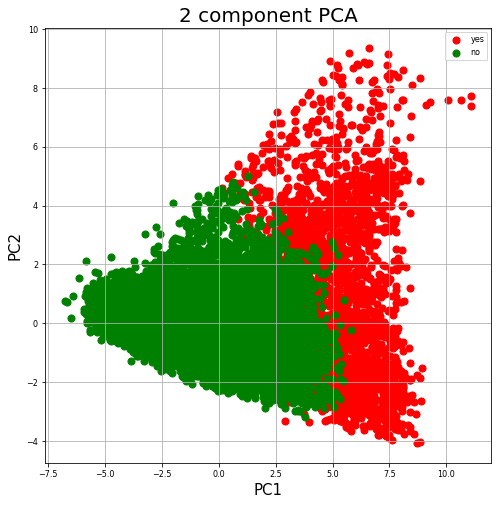

In [116]:
X_train_pca = pd.DataFrame(data = X_train
             , columns = ['PC1', 'PC2']) 
finalDf = pd.concat([X_train_pca, Y_train.map({0:"yes",1:"no"})], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["yes", "no"]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Failure_status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

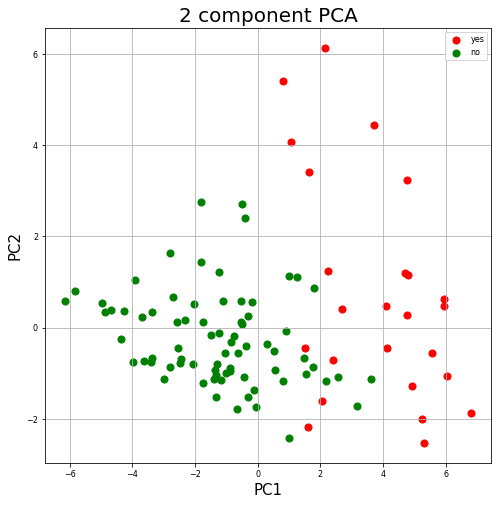

In [117]:
X_test_pca = pd.DataFrame(data = X_test
             , columns = ['PC1', 'PC2']) 

finalDf = pd.concat([X_test_pca, Y_test.map({0:"yes",1:"no"})], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Failure_status'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Dealing With Imbalanced Data
As we can see, the data is extremely imbalanced, where the 'yes' class only accounts for 15% of all entries of the train dataset

In [118]:
df = pd.concat([X_train_pca.assign(Failure_status=Y_train), X_test_pca.assign(Failure_status=Y_test)])
X = df.iloc[:, :df.shape[1]-1]
y = df.iloc[:, df.shape[1]-1]

### Undersampling

In [119]:
rus = RandomUnderSampler(random_state=42, replacement=True) 
X_train_u, Y_train_u = rus.fit_resample(X_train_pca, Y_train)
print(Y_train_u.value_counts())

0    3100
1    3100
Name: Failure_status, dtype: int64


In [120]:
#Undersampling the entire dataset
X_df_u, y_df_u = RandomUnderSampler(random_state=42, replacement=True).fit_resample(X,y)
print(y_df_u.value_counts())

0    3125
1    3125
Name: Failure_status, dtype: int64


### SMOTE - Oversampling

In [121]:
X_train_o, Y_train_o = SMOTE().fit_resample(X_train_pca, Y_train)
print(Y_train_o.value_counts())

1    17531
0    17531
Name: Failure_status, dtype: int64


In [122]:
#Oversampling the entire dataset
X_df_o, y_df_o = SMOTE(sampling_strategy="minority").fit_resample(X,y)
print(y_df_o.value_counts())

1    17606
0    17606
Name: Failure_status, dtype: int64


## SMOTE + TomekLinks


In [123]:
tl = SMOTETomek(random_state=139)
X_tl, y_tl = tl.fit_resample(X_train_pca, Y_train)
print(y_tl.value_counts())

1    17157
0    17157
Name: Failure_status, dtype: int64


## ADASYN


In [124]:
ada = ADASYN(random_state=130)
X_ada, y_ada = ada.fit_resample(X_train_pca, Y_train)
print(y_ada.value_counts())

1    17531
0    17250
Name: Failure_status, dtype: int64


# SMOTE + Unsersampler

In [125]:
# values to evaluate
over_values = [0.3,0.4,0.5]
under_values = [0.7,0.6,0.5]
for o in over_values:
  for u in under_values:
    # define pipeline
    model = SVC()
    over = SMOTE(sampling_strategy=o)
    under = RandomUnderSampler(sampling_strategy=u)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    scores = cross_val_score(pipeline, X_train_pca, Y_train, scoring='roc_auc', cv=5, n_jobs=-1)
    score = mean(scores)
    print('SMOTE oversampling rate:%.1f, Random undersampling rate:%.1f , Mean ROC AUC: %.3f' % (o, u, score))


SMOTE oversampling rate:0.3, Random undersampling rate:0.7 , Mean ROC AUC: 0.982
SMOTE oversampling rate:0.3, Random undersampling rate:0.6 , Mean ROC AUC: 0.982
SMOTE oversampling rate:0.3, Random undersampling rate:0.5 , Mean ROC AUC: 0.982
SMOTE oversampling rate:0.4, Random undersampling rate:0.7 , Mean ROC AUC: 0.981
SMOTE oversampling rate:0.4, Random undersampling rate:0.6 , Mean ROC AUC: 0.982
SMOTE oversampling rate:0.4, Random undersampling rate:0.5 , Mean ROC AUC: 0.981
SMOTE oversampling rate:0.5, Random undersampling rate:0.7 , Mean ROC AUC: 0.981
SMOTE oversampling rate:0.5, Random undersampling rate:0.6 , Mean ROC AUC: 0.982
SMOTE oversampling rate:0.5, Random undersampling rate:0.5 , Mean ROC AUC: 0.980


As can be seen, Oversampling rate of 0.3 and undersampling rate of 0.6 provide the best result

In [126]:
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('over', over), ('under', under)]
pipeline = Pipeline(steps=steps)
X_hybrid, y_hybrid = pipeline.fit_resample(X_train_pca, Y_train)

# Classifiers

## SVC

In [127]:
#Defining the Grid Search Cross Validation
param_grid = {'C': [0.1], 
              'gamma': [0.1],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

### Original Data

In [128]:
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train_pca, Y_train)
best_estimator = grid.best_estimator_
best_estimator

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.970 total time=   3.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   2.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.963 total time=   2.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   2.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.960 total time=   2.7s


SVC(C=0.1, gamma=0.1)

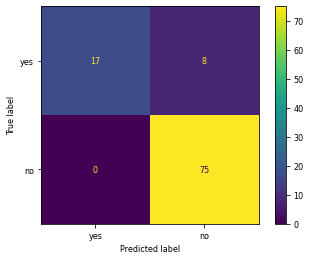

[Yes, No]> F1 Score:[0.80952381 0.94936709]


In [132]:
pred_labels = best_estimator.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()
print(f"[Yes, No]> F1 Score:{f1_score(Y_test,pred_labels, average = None)}")

### Undersampled Data

In [133]:
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train_u, Y_train_u)
best_estimator_us = grid.best_estimator_
best_estimator_us

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.935 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.944 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.3s


SVC(C=0.1, gamma=0.1)

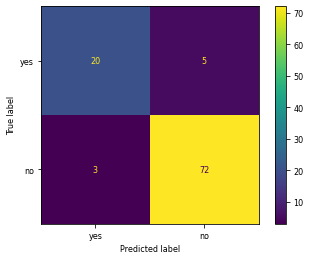

[Yes, No]> F1 Score:[0.83333333 0.94736842]


In [134]:
pred_labels = best_estimator_us.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()
print(f"[Yes, No]> F1 Score:{f1_score(Y_test,pred_labels, average = None)}")

### Oversampled Data

In [135]:
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_train_o, Y_train_o)
best_estimator_os = grid.best_estimator_
best_estimator_os

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=  10.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=  10.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=  10.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   9.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.948 total time=   9.6s


SVC(C=0.1, gamma=0.1)

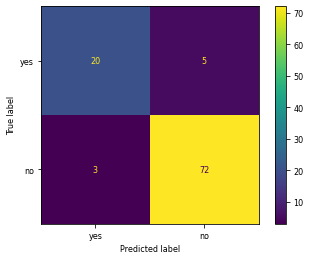

[Yes, No]> F1 Score:[0.83333333 0.94736842]


In [136]:
pred_labels = best_estimator_os.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()
print(f"[Yes, No]> F1 Score:{f1_score(Y_test,pred_labels, average = None)}")

### SMOTE + Tomek Links

In [137]:
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_tl, y_tl)
best_estimator_tl = grid.best_estimator_
best_estimator_tl

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.958 total time=   7.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.957 total time=   7.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.965 total time=   8.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   7.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   8.1s


SVC(C=0.1, gamma=0.1)

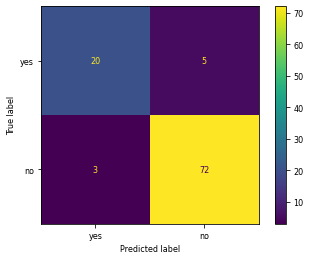

[Yes, No]> F1 Score:[0.83333333 0.94736842]


In [138]:
pred_labels = best_estimator_os.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()
print(f"[Yes, No]> F1 Score:{f1_score(Y_test,pred_labels, average = None)}")

### ADASYN

In [139]:
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(X_ada, y_ada)
best_estimator_ada = grid.best_estimator_
best_estimator_ada

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.921 total time=  17.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.906 total time=  16.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=  17.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=  14.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=  15.4s


SVC(C=0.1, gamma=0.1)

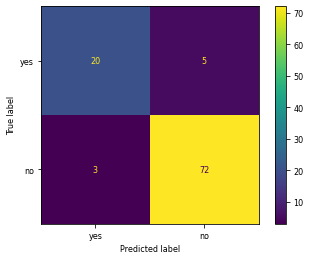

[Yes, No]> F1 Score:[0.83333333 0.94736842]


In [140]:
pred_labels = best_estimator_os.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()
print(f"[Yes, No]> F1 Score:{f1_score(Y_test,pred_labels, average = None)}")

### SMOTE + Undersampler

In [141]:
# fitting the model for grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

grid.fit(X_hybrid, y_hybrid)
best_estimator_su = grid.best_estimator_
best_estimator_su

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.940 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.951 total time=   1.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   1.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.948 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.946 total time=   1.4s


SVC(C=0.1, gamma=0.1)

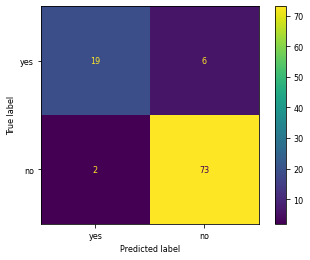

[Yes, No]> F1 Score:[0.82608696 0.94805195]


In [142]:
pred_labels = best_estimator_su.predict(X_test_pca)
cm = confusion_matrix(Y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["yes","no"])
disp.plot()
plt.show()
print(f"[Yes, No]> F1 Score:{f1_score(Y_test,pred_labels, average = None)}")